In [4]:
!pip install pandas_datareader
!pip install yfinance
!pip install fix_yahoo_finance

     |████████████████████████████████| 107 kB 1.8 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=cc38f664e0d8862dc2e15fe6d3d6195ec7ad701fe1684a7af229e6297610c4c8
  Stored in directory: /Users/kangjuhyun/Library/Caches/pip/wheels/b4/c3/39/9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=bd9de4d4d945b0aaaabfe322b67abb45236d1207968d0fa97355cc21f186dfcb
  Stored in directory: /Users/kangjuhyun/Library/Caches/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7058 sha256=341c14a951b255a3305ad43f9396a92a66ca4629325c243cc74d265b12e876ba
  Stored in directory: /Users/kangjuhyun/Library/Caches/pip/wheels/44/7c/7f/ec81717ef91a3feb245984b619e6828141568aa292797b7ac3
Successfully built

In [6]:
# 시계열 데이터를 통한 주식 분석
from pandas_datareader import data
import datetime
import yfinance as yf
yf.pdr_override()

In [14]:
start_date = '2010-01-01'
name = '034730.KS' # yahoo에 검색할 때
df = data.get_data_yahoo(name, start_date)

[*********************100%***********************]  1 of 1 completed


In [15]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,45300.0,47600.0,44700.0,47250.0,42860.449219,416886
2010-01-05,48000.0,49800.0,47350.0,49050.0,44493.230469,814484
2010-01-06,49250.0,51300.0,48600.0,50000.0,45354.972656,715782


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

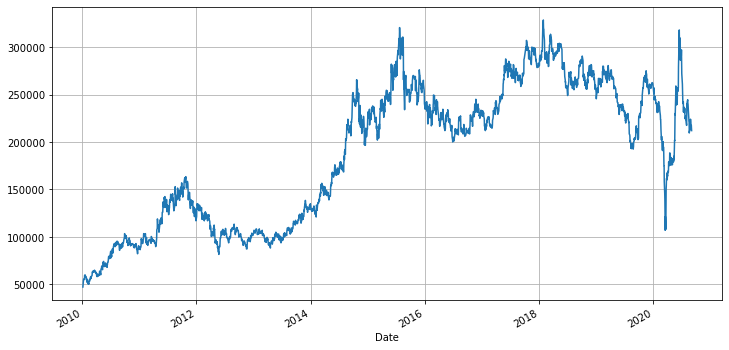

In [19]:
df['Close'].plot(figsize=(12,6), grid=True)

In [36]:
# df_trunc = df[:'2019-12-31']
df_trunc = df[:'2020-09-04']
df_trunc.head(3)
df_trunc.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-28,218500.0,230000.0,218000.0,224000.0,224000.0,446589
2020-08-31,224000.0,227500.0,212500.0,214000.0,214000.0,487729
2020-09-01,213500.0,215500.0,210500.0,214500.0,214500.0,200276
2020-09-02,214500.0,217500.0,213000.0,217500.0,217500.0,159873
2020-09-04,209500.0,212000.0,209000.0,212000.0,212000.0,281391


In [37]:
new_df = pd.DataFrame({'ds':df_trunc.index, 'y':df_trunc['Close']})
new_df.reset_index(inplace=True)
del new_df['Date']
new_df.head(3)

,ds,y
0,2010-01-04,47250.0
1,2010-01-05,49050.0
2,2010-01-06,50000.0


In [38]:
from fbprophet import Prophet

In [39]:
m = Prophet()
m.fit(new_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = m.make_future_dataframe(periods=365 * 2)
future.tail(3)

,ds
3356,2022-09-02
3357,2022-09-03
3358,2022-09-04


In [41]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
3356,2022-09-02,144121.303643,50788.372226,244730.338080
3357,2022-09-03,139419.579977,46959.930223,238498.814680
3358,2022-09-04,139372.513228,43789.502228,240732.152321


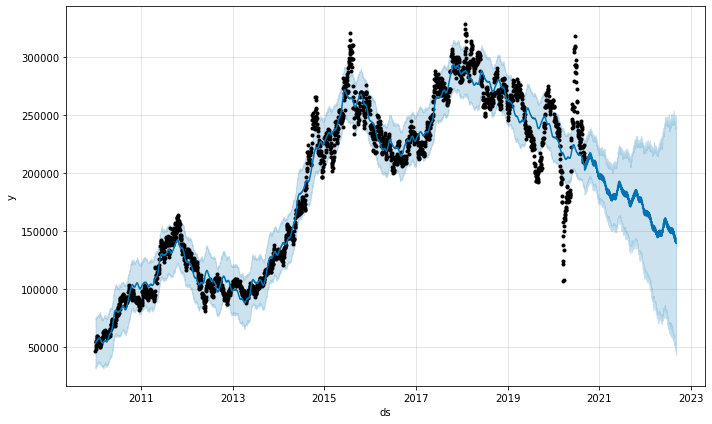

In [42]:
m.plot(forecast);

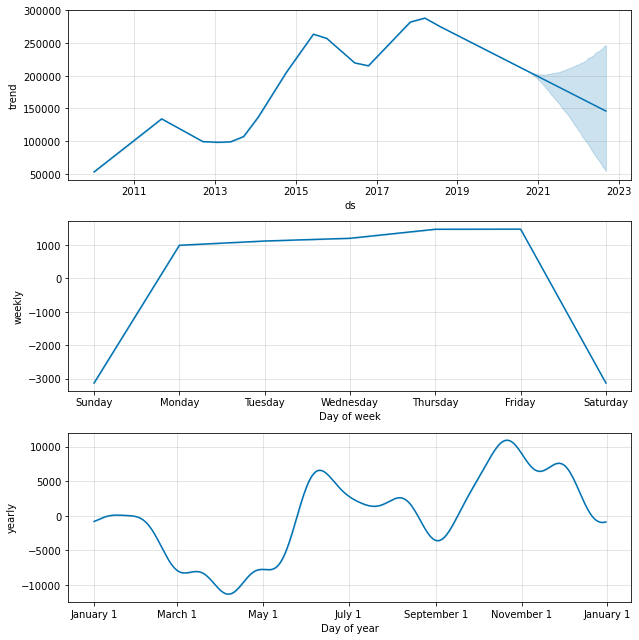

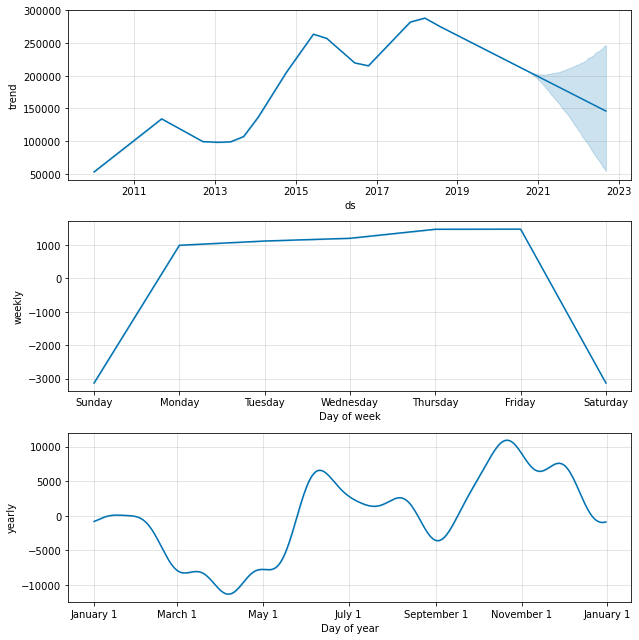

In [43]:
m.plot_components(forecast)

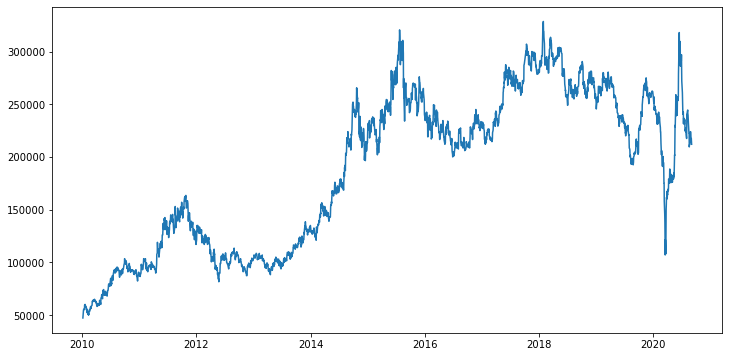

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='real')
plt.show()

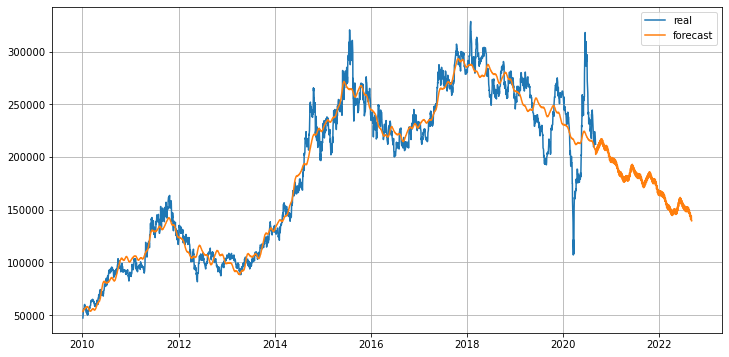

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid() # 표 안에 선
plt.legend() # 오른쪽 위에 선 종류 알려주는거
plt.show()

In [49]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3354,2022-08-31,146412.393931,52084.156179,247743.851080,55619.725072,246732.465326,-2239.841830,-2239.841830,-2239.841830,1202.074433,1202.074433,1202.074433,-3441.916263,-3441.916263,-3441.916263,0.0,0.0,0.0,144172.552101
3355,2022-09-01,146326.148418,49840.158823,243296.213425,55361.410162,246904.034215,-2069.165779,-2069.165779,-2069.165779,1472.193899,1472.193899,1472.193899,-3541.359678,-3541.359678,-3541.359678,0.0,0.0,0.0,144256.982639
3356,2022-09-02,146239.902905,50788.372226,244730.338080,55116.353200,246892.772106,-2118.599261,-2118.599261,-2118.599261,1476.365068,1476.365068,1476.365068,-3594.964329,-3594.964329,-3594.964329,0.0,0.0,0.0,144121.303643
3357,2022-09-03,146153.657391,46959.930223,238498.814680,54881.212456,246881.509998,-6734.077414,-6734.077414,-6734.077414,-3131.972525,-3131.972525,-3131.972525,-3602.104889,-3602.104889,-3602.104889,0.0,0.0,0.0,139419.579977
3358,2022-09-04,146067.411878,43789.502228,240732.152321,54515.094154,246870.247889,-6694.898650,-6694.898650,-6694.898650,-3131.972540,-3131.972540,-3131.972540,-3562.926110,-3562.926110,-3562.926110,0.0,0.0,0.0,139372.513228


In [50]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,52992.623203,31940.990533,75244.091082,52992.623203,52992.623203,402.944315,402.944315,402.944315,992.924370,992.924370,992.924370,-589.980055,-589.980055,-589.980055,0.0,0.0,0.0,53395.567518
1,2010-01-05,53124.888641,33805.661097,74590.317968,53124.888641,53124.888641,621.149819,621.149819,621.149819,1120.387296,1120.387296,1120.387296,-499.237477,-499.237477,-499.237477,0.0,0.0,0.0,53746.038460
2,2010-01-06,53257.154079,33557.323693,74281.703420,53257.154079,53257.154079,792.652176,792.652176,792.652176,1202.074433,1202.074433,1202.074433,-409.422257,-409.422257,-409.422257,0.0,0.0,0.0,54049.806255
3,2010-01-07,53389.419517,34025.705257,76309.842195,53389.419517,53389.419517,1149.013746,1149.013746,1149.013746,1472.193899,1472.193899,1472.193899,-323.180153,-323.180153,-323.180153,0.0,0.0,0.0,54538.433263
4,2010-01-08,53521.684956,33627.447069,74493.046463,53521.684956,53521.684956,1233.662288,1233.662288,1233.662288,1476.365068,1476.365068,1476.365068,-242.702780,-242.702780,-242.702780,0.0,0.0,0.0,54755.347244


In [88]:
# 9/1 ~ 9/4 까지의 주식 가격 표시
forecast[(forecast.ds >= '2020-09-01') & (forecast.ds <= '2020-09-04')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2626,2020-09-01,209285.373183,186361.324462,227124.173374,209285.373183,209285.373183,-2453.561875,-2453.561875,-2453.561875,1120.387296,1120.387296,1120.387296,-3573.949171,-3573.949171,-3573.949171,0.0,0.0,0.0,206831.811309
2627,2020-09-02,209199.127670,185904.967900,227189.769815,209199.127670,209199.127670,-2402.276962,-2402.276962,-2402.276962,1202.074433,1202.074433,1202.074433,-3604.351395,-3604.351395,-3604.351395,0.0,0.0,0.0,206796.850708
2628,2020-09-04,209026.636643,186694.714768,225737.178783,209026.636643,209026.636643,-2049.851383,-2049.851383,-2049.851383,1476.365068,1476.365068,1476.365068,-3526.216451,-3526.216451,-3526.216451,0.0,0.0,0.0,206976.785260
